# Spam Email Classification
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Summary
### 1 Introduction
### 2 The dataset
### 3 PCA
### 4 LDA
### 5 SVM
### 6 MLP
### 7 Conclusions

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1 Introduction
The aim of this study is to analyze a dataset containing various characteristics regarding the morphology and structure of an email, followed by classification into spam or non-spam categories.

The term spam refers to unwanted or unsolicited emails, such as advertisements, scams, chain emails, and pornography.

Most attributes indicate, for example, the frequency of a certain word within the email body or the length of any sequences of capital letters.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, make_scorer
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import scipy.stats as stats
import pylab

## 2 The dataset

The dataset under analysis was provided by the **UCI Machine Learning Repository**.

It consists of 4601 email records analyzed across 58 features.

### 2.1 Features

* 48 attributes in the real interval [0,100] of type **word_freq_WORD**: 
   It represents the percentage of words in the email text that match *WORD*. A "word" here is defined as any string of alphanumeric characters delimited by non-alphanumeric characters or end-of-string.

* 6 attributes in the real interval [0,100] of type **char_freq_CHAR**: 
   It represents the percentage of characters in the email text that match *CHAR*.

* 1 attribute in the real interval [1,...] of type **capital_run_length_average**:
   It denotes the average length of uninterrupted sequences of capital letters.

* 1 attribute in the integer interval [1,...] of type **capital_run_length_longest**:
   It indicates the length of the longest uninterrupted sequence of capital letters.
* 1 attribute in the integer interval [1,...] 
of type **capital_run_length_total**:
   It represents the sum of the lengths of uninterrupted sequences of capital letters, essentially the total number of capital letters in the email.

* 1 attribute of type **class** with values in {0,1}:
   It denotes whether the email was classified as spam (1) or non-spam (0).




## 2.2 Dataset Observation
The dataset consists of 58 columns containing numerical data.


In [3]:
spambase=pd.read_csv('spambase.data',header=None)
col_names=['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive',
'word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000',
'word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology',
'word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference',
'char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']
rename_dict={k:col_names[k] for k in range (0,58)}
spambase.rename( columns=rename_dict, inplace=True)

spambase

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


Now, let's observe some general characteristics of the dataset:


In [5]:
spambase.describe()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


Let's consider:
* **count**: the total number of records in the dataset;
* **mean**: the average value of each attribute;
* **std**: the standard deviation, indicating the degree of dispersion around the mean for each attribute;
* **min**: the minimum value of the attribute recorded within the dataset;
* **max**: the maximum value assumed by the attribute within the dataset.

We can observe that some attributes span a very wide range:

For example, *char_freq_#* ranges from 0 to 19.83 (meaning there is at least one email in the dataset where nearly 20 out of every 100 characters are *#*), and *capital_length_longest* takes values between 1 and 9989.


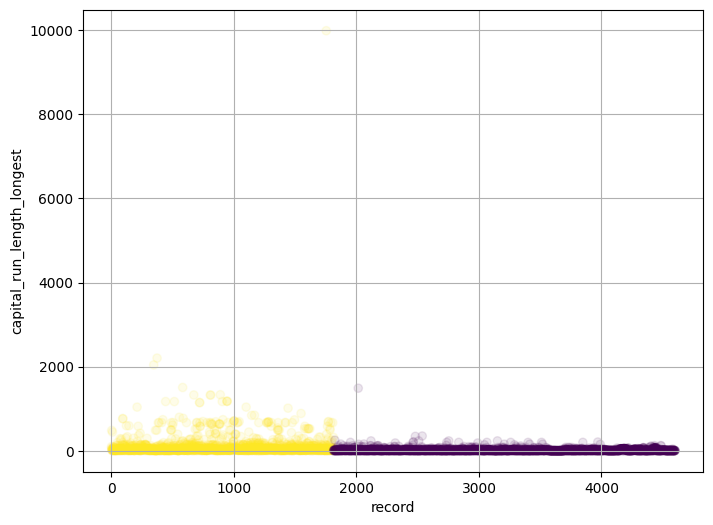

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(np.linspace(1,4601,4601),spambase['capital_run_length_longest'], c=spambase['class'].values,alpha=0.1)

plt.xlabel('record')
plt.ylabel('capital_run_length_longest')
plt.grid()
#plt.legend([yellow="spam" purple="non spam"])

plt.show()

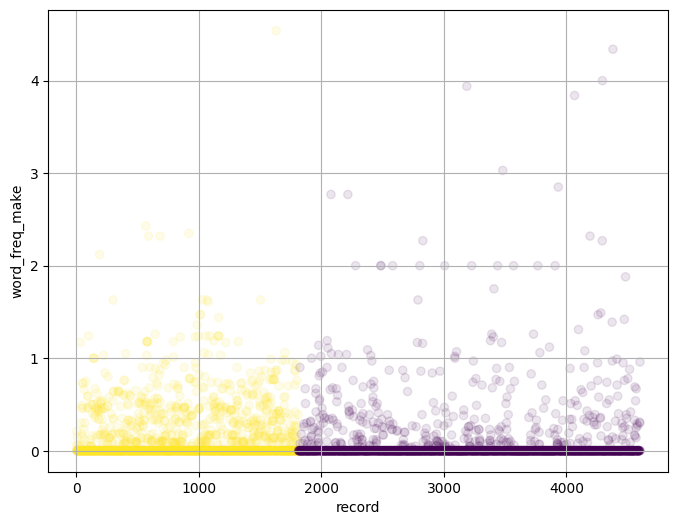

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(np.linspace(1,4601,4601),spambase['word_freq_make'], c=spambase['class'].values,alpha=0.1)

plt.xlabel('record')
plt.ylabel('word_freq_make')
plt.grid()
#plt.legend([yellow="spam" purple="non spam"])

plt.show()

As can be seen from these two graphs, for some attributes, it's not possible to distinguish between the values assumed by spam and non-spam emails (see the case of *word_freq_make*), while in other cases, the distinction is visible. For example, in the case of *capital_run_length_longest*, the values assumed by emails classified as *spam* tend to be higher overall.


# 3 Principal Components Analysis

To reduce computational costs, it can be useful to apply dimensionality reduction to the dataset while trying to preserve as much information as possible.

Given a dataset $\subseteq\mathbb{R}^{D}$ and a fixed $M>0$, Principal Component Analysis (PCA) aims to identify the directions in which the data exhibit the maximum variance so that reducing the dataset's dimensionality from $D$ to $M$ occurs with the least possible loss of information.

* Firstly, we proceed with data standardization, as we have observed that the samples have widely varied values. Standardizing the data involves rescaling them so that they have zero mean and unit standard deviation.

* Then, the algorithm calculates the eigenvalues and corresponding eigenvectors of the scatter matrix $$S=\sum_{i=0}^{N} {x_ix_i^{T}}$$ where $N$ is the number of records in the dataset.
* The $M$ eigenvectors ${\{e_k\}}_{k=1}^{M}$ (the principal components) corresponding to the top $M$ maximum eigenvalues (explained variance) are selected, and they will form the columns of a new matrix $E=[e_1 \dots e_k]$.
* $y_i=E^{T}x_i$ is the best $M$-dimensional approximation of $x_i$.

In the present case, $D=57$ and $N=4601$.


c:\Users\campa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


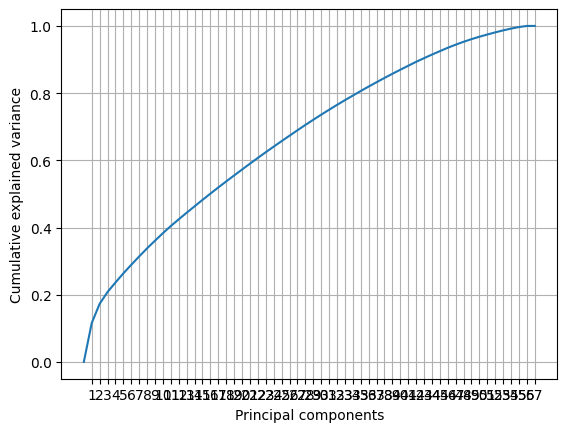

In [8]:
X_spambase = spambase.iloc[:, :-1]
scaler_spambase = StandardScaler()
scaler_spambase.fit(X_spambase.values)
X_spambase_scaled = scaler_spambase.transform(X_spambase.values)
y_spambase=spambase["class"]
pca_spambase_std=PCA()
pca_spambase_std.fit(X_spambase_scaled)
plt.figure()
plt.plot(np.insert(np.cumsum(pca_spambase_std.explained_variance_ratio_), 0, 0))
plt.rcParams['figure.figsize'] = [25, 10]
plt.xticks(ticks=np.arange(1, pca_spambase_std.n_features_ + 1), 
           labels=[i for i in range(1, pca_spambase_std.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

c:\Users\campa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


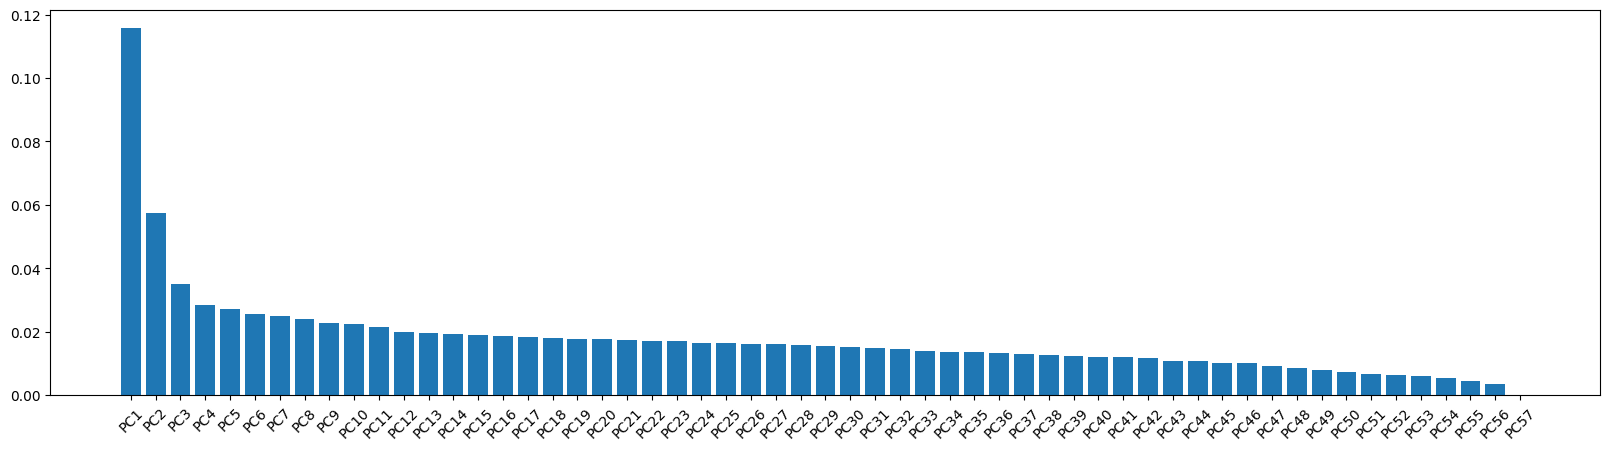

In [9]:

plt.figure(figsize=(20, 5))
plt.bar(np.arange(pca_spambase_std.n_features_), pca_spambase_std.explained_variance_ratio_)
plt.xticks(ticks=np.arange(pca_spambase_std.n_features_), 
           labels=[f'PC{i}' for i in range(1, pca_spambase_std.n_features_ + 1)],
           rotation=45)


plt.show()

In [10]:
explvar_p = 0.9

pca = PCA(explvar_p)
pca.fit(X_spambase_scaled)

df_pca = pd.DataFrame({'val': [pca.n_components_, pca.explained_variance_ratio_.sum()]}, index=['n. PC', 'expl. Var. (%)'])
display(df_pca)

,val
n. PC,43.000000
expl. Var. (%),0.903928


Assuming we want to preserve 90% of the explained variance, the number of principal components to consider is 43, i.e., $M=43$.


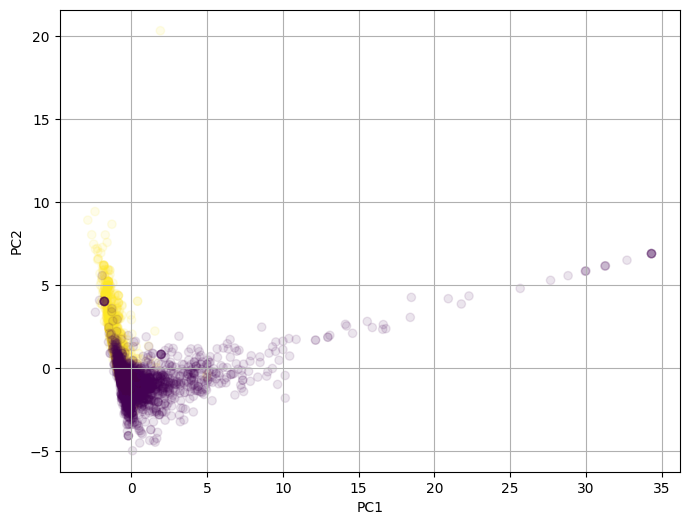

In [11]:
pca_spambase_m = PCA(n_components=2)
pca_spambase_m.fit(X_spambase_scaled)
Y_spambase_m = pca_spambase_m.transform(X_spambase_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(Y_spambase_m[:, 0], Y_spambase_m[:, 1], c=spambase['class'].values,alpha=0.1)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()

plt.show()

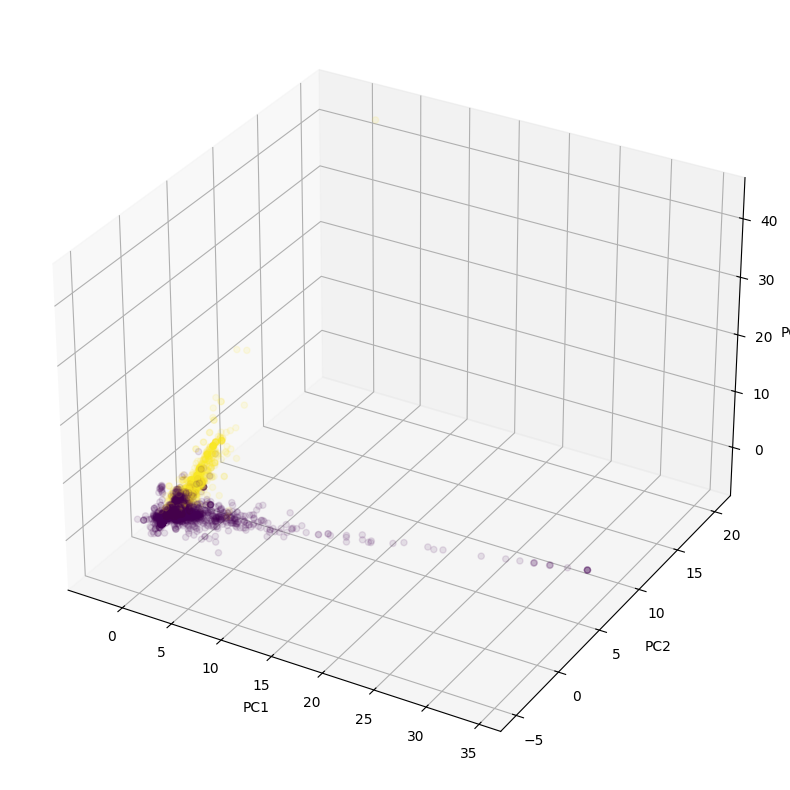

In [12]:
pca_spambase_m = PCA(n_components=3)
pca_spambase_m.fit(X_spambase_scaled)
Y_spambase_m = pca_spambase_m.transform(X_spambase_scaled)

fig_spambase = plt.figure()
ax = fig_spambase.add_subplot(111, projection='3d')
ax.scatter(Y_spambase_m[:, 0], Y_spambase_m[:, 1], Y_spambase_m[:, 2],c=spambase['class'].values,alpha=0.1)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()

Despite being the ones that contribute the most, the first two principal components together explain less than 18% of the variance, and indeed, considering only these two, it's not possible to observe a significant separation of the classes.

However, if we also consider the third principal component, the separation between the two classes becomes more visible.


# 4 Linear Discriminant Analysis

Unlike PCA, LDA is an example of supervised learning.

LDA is a classification technique obtained as a generalization of Fisher Discriminant Analysis (FDA).
The goal of FDA is to find a direction along which the samples of the classes are most separated, and the distance between the samples within the same class is minimized.

* Calculate the **within scatter matrix**, i.e., the dispersion matrix of the data within the classes:
$$ S_W=S_1+S_2$$
 where $ \displaystyle S_i=\sum_{x_j\in\,class\,i} (x_j-{\mu}_i)(x_j-{\mu}_i)^T$,
 
 with $ \displaystyle {\mu}_i=\frac{1}{n}\sum_{x_j\in class\,i} x_j\,$ 
     and n=number of elements in class *i*.
 * Calculate the **between scatter matrix**, which measures the separation between the means of the two classes before projection:
 
$$ S_B=({\mu}_1 - {\mu}_2)({\mu}_1 - {\mu}_2)^T.$$
* Compute eigenvalues and eigenvectors by solving the problem $${S_W}^{-1}S_B v=\lambda v$$
yielding $v=S_{w}^{-1}({\mu}_1-{\mu}_2)$

Additional requirements for applying LDA include **homoscedasticity**, i.e., equality of the variance-covariance matrices between classes, and that the data in each class have a **normal distribution**.


Let's now assess whether the dataset under analysis meets the requirements for performing LDA.
We divide the spambase dataset into two smaller datasets: the first containing spam emails and the second containing non-spam emails.
For the LDA method to be applicable, the data in each class must have a normal distribution. Therefore, we conduct Q-Q plots of the attributes for each class.
The Quantile-Quantile plot is a graphical tool that allows us to infer whether a dataset is derived from a normal probability distribution.
It is obtained by plotting the set of normal quantiles against those obtained from the sample data: if the two sets are derived from the same distribution (i.e., the normal distribution), the points on the plot should fall approximately along a straight line.

In [13]:
spam=spambase.iloc[0:1812,:]
nonspam=spambase.iloc[1812:4600,:]

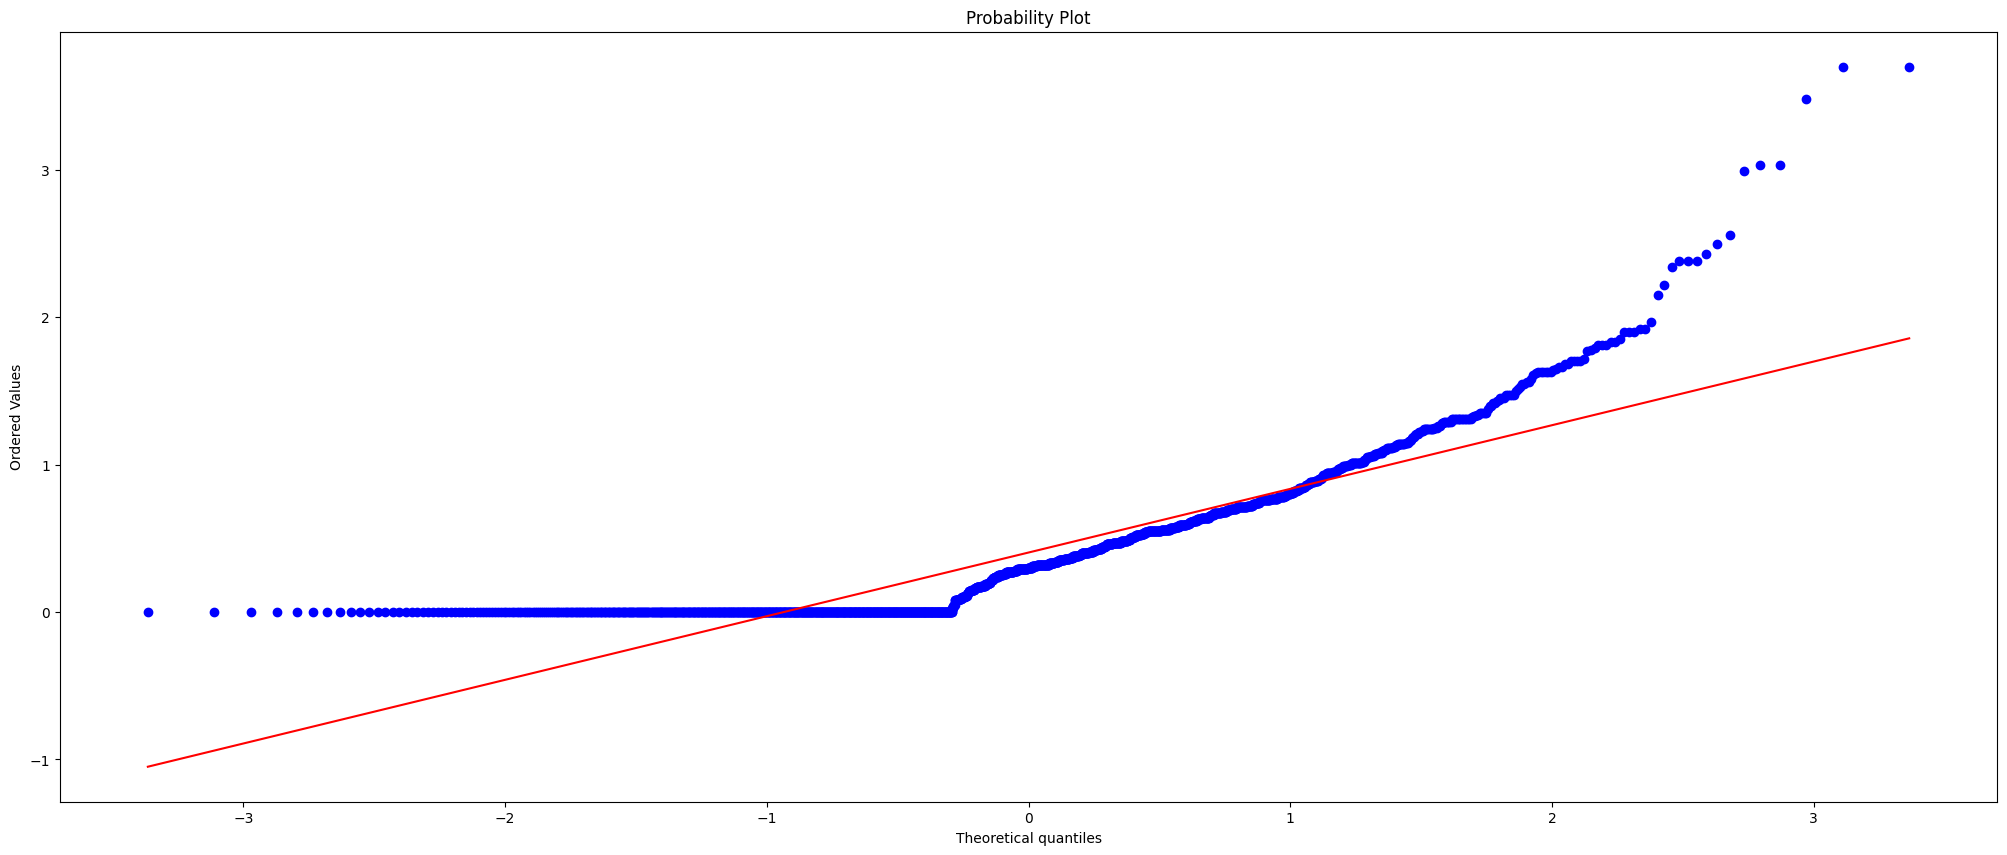

In [14]:
data=spam['word_freq_all']
stats.probplot(data, dist="norm",plot=pylab)
pylab.show()

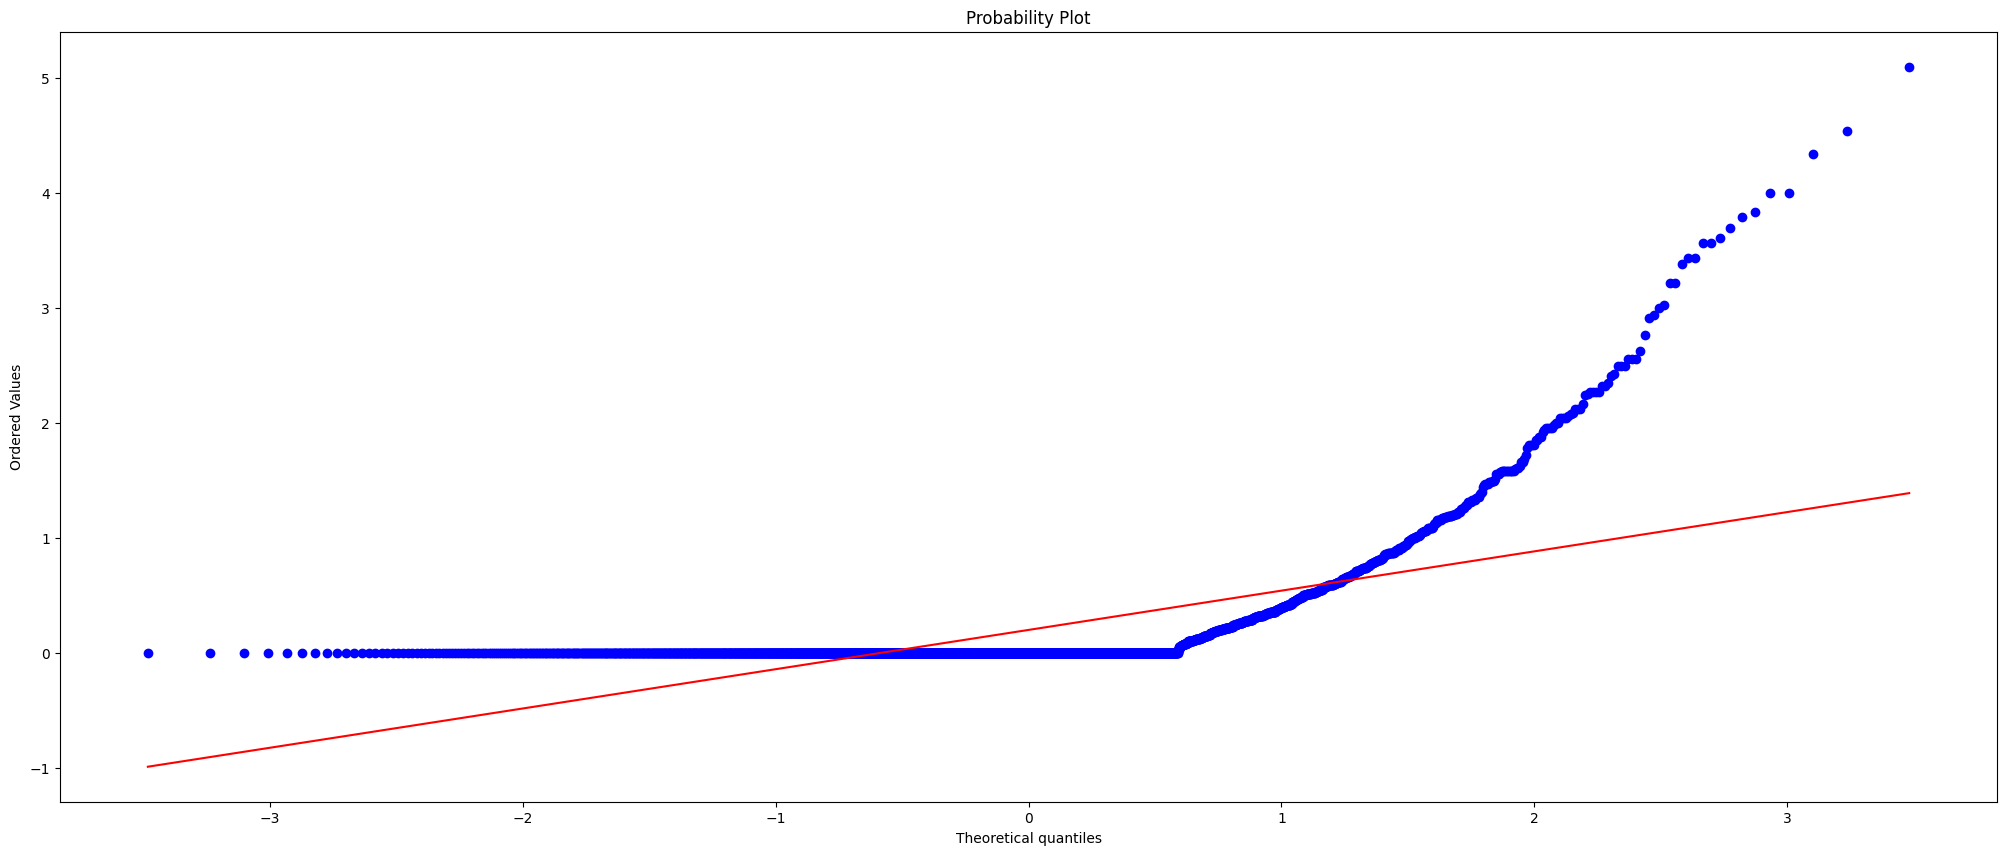

In [15]:
data=nonspam['word_freq_all']
stats.probplot(data, dist="norm",plot=pylab)
pylab.show()

By evaluating the Q-Q plots of the *word_freq_all* attribute in the spam dataset and the non-spam dataset, we can observe that in both cases, it deviates significantly from the sought-after straight line. This implies that we cannot assume that the data from the two classes have a normal distribution, and therefore, we cannot apply the LDA method.

# 5 Support Vector Machine

The goal of the SVM method is to find the best hyperplane that divides the data space. Data points are classified with a label $\in\{-1,+1\}$ such that samples identified by a positive label lie in the part of space delimited by the hyperplane considered positive. The best separating hyperplane is the one that maximizes the margin between the two classes.

We define *support vectors* as the vectors corresponding to the data points with the minimum distance from the separating hyperplane, which influence its position and orientation. The margin is defined as *hard* when the two classes do not overlap.

Let $Q~\in\mathbb{R}^{nxn}$ such that $$Q=(y_iy_jx_{i}^{t}x_j)_{i,j=1,...,n}$$ with $n$ being the number of samples and $y_i\in\{-1,+1\}\, \forall\,i$ and $\alpha\in\mathbb{R}^n$.

We compute the solution to the dual problem:

\begin{equation}
\begin{cases}
\min_{\boldsymbol{\alpha}} \frac{1}{2}\boldsymbol{\alpha}^\top Q \boldsymbol{\alpha} - \sum_{i=1}^n \alpha_i\\
\sum_{i=1}^n \alpha_i y_i = 0\\
\alpha_i \geq 0\,,\quad \forall \ i=1,\ldots ,n
\end{cases}\,,
\end{equation}

Let $\alpha^*$ be the solution to the dual problem,

$$w^*=\sum_{i=1}^{n}y_i\alpha_{i}^{*}x_i \, \in \mathbb{R}^n$$
$$ b^*=\frac{1}{|I|}\sum_{i\in I}(y_i-{w^{*}}^t x_i)\, \in \mathbb{R}$$

where the pair $(w^*,b^*)$ defines the hyperplane $\Pi_{w^*,b^*}$ and $I$ is the set of indices corresponding to the non-zero elements of $\alpha^*$.


Let's divide the dataset into **Training set** and **Test set**, on which the algorithm is respectively trained and tested. In our case, the training set will contain 70% of the data.
The data splitting is done randomly using the seed 20210708. 
Finally, we calculate the **accuracy** of the algorithm as 
$$ acc(T)=\frac{correct\,predictions\,on\,T}{|T|}$$
where T is the test set.


In [16]:
random_seed = 20210708  # Random seed caratterizzante la suddivisione in training e test set
test_p = 0.30  # Percentuale di dati da utilizzare come test set

X_train, X_test, y_train, y_test = train_test_split(X_spambase_scaled,y_spambase,test_size=test_p, random_state=random_seed, shuffle=True)

In [17]:
C_hard = 1e10
loss = 'squared_hinge'
dual = False


lsvm_hard = LinearSVC(C=C_hard, loss=loss, dual=dual, random_state=random_seed)
lsvm_hard_pca = LinearSVC(C=C_hard, loss=loss, dual=dual, random_state=random_seed)

lsvm_hard.fit(X_train, y_train)
lsvm_hard_pca.fit(pca.transform(X_train), y_train)
scores_dict = {'Training Set': lsvm_hard.score(X_train,y_train), 'Test Set':lsvm_hard.score(X_test,y_test)}
scores_dict_pca={'Training Set': lsvm_hard_pca.score(pca.transform(X_train),y_train),'Test Set':lsvm_hard_pca.score(pca.transform(X_test),y_test)}

scores = pd.DataFrame(scores_dict, index=['Accuracy'])
scores_pca=pd.DataFrame(scores_dict_pca,index=['Accuracy'])
display(scores)
display(scores_pca)




,Training Set,Test Set
Accuracy,0.925466,0.931933


,Training Set,Test Set
Accuracy,0.91646,0.92252


The classifier achieves an accuracy of 93.2% on the test set in the case of LSVM performed on the original dataset and a one percentage point reduction in the case of LSVM performed with the dataset reduced via PCA.

# 6 Multi Layer Perceptron

Multi Layer Perceptrons (MLPs) are an example of a feedforward neural network (i.e., one that does not contain cycles or recursion in its structure) and are characterized by fully connected internal layers.
* Let $\sigma : \mathbb{R}\rightarrow\mathbb{R}$ be the activation function applied to each neuron in a layer.
* Let $L$ be a Fully Connected layer (FC) with $m\in\mathbb{N}$ neurons subject to $\sigma$ and fully connected to another layer of $n$ units.
* The layer $L$ is characterized by the function $\mathcal{L}:\mathbb{R}^n\rightarrow\mathbb{R}^m$ such that:
$$ \mathcal{L}(x):=\boldsymbol{\sigma}(Wx+b),\,\,\,\forall x\in\mathbb{R}^n$$ 
where
  - $W\in\mathbb{R}^{m\times n}$ is the weight matrix of layer $L$;
  - $\boldsymbol{b}\in\mathbb{R}^m$ is the bias vector;
  - $\boldsymbol{\sigma}:\mathbb{R}^m\rightarrow\mathbb{R}^m$ is a vectorial function that applies $\sigma$ element-wise. 
* An input layer of $n\in\mathbb{N}$ is a layer that "reads" vectors $ \in\mathbb{R}^n$ and "sends" them to the connected subsequent layers.
* Given an MLP consisting of an input layer $L^{(0)}$ with $n\in\mathbb{N}$ units, followed by a sequence of FC layers $L^{(1)},\ldots ,L^{(H)}, L^{(H+1)}$ connected one after the other.
* The MLP in question is represented by a function $\hat{\boldsymbol{F}}:\mathbb{R}^n\rightarrow \mathbb{R}^m$ such that
\begin{equation}
\hat{\boldsymbol{F}}(\boldsymbol{x}) : \mathbb{R}^n \xrightarrow[]{\mathcal{L}^{(1)}} \mathbb{R}^{n_1} \xrightarrow[]{\mathcal{L}^{(2)}} \cdots \xrightarrow[]{\mathcal{L}^{(H)}} \mathbb{R}^{n_H}\xrightarrow[]{\mathcal{L}^{(H+1)}}\mathbb{R}^m
\end{equation}

$\hat{\boldsymbol{F}}$ depends on the weights $W$ and biases $\boldsymbol{b}$ of each layer. To make this dependence explicit, we will use the notation
$\hat{\boldsymbol{F}}_{\boldsymbol{w}}(\ \cdot \ )$, where $w$ is the vector obtained by concatenating the vectorizations of all the weights and biases.



Training a MLP neural network involves minimizing a function called *Loss*. Some commonly used loss functions include:

1. **Mean Square Error** (MSE):
$$\mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w}):=\frac{1}{T}\sum_{i=1}^{T} \left(\boldsymbol{y}_i - \hat{F}_{\boldsymbol{w}}(\boldsymbol{x}_i) \right)^2;$$

2. **Mean Absolute Error** (MAE):
$$\mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w}):=\frac{1}{T}\sum_{i=1}^{T} | \boldsymbol{y}_i - \hat{F}_{\boldsymbol{w}}(\boldsymbol{x}_i) |;$$

3. **Sum of Square Error** (SSE):
$$\mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w}):= \sum_{i=1}^{T} \left(\boldsymbol{y}_i - \hat{F}_{\boldsymbol{w}}(\boldsymbol{x}_i) \right)^2;$$

4. **Sum of Absolute Error** (SAE):
$$\mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w}):= \sum_{i=1}^{T} | \boldsymbol{y}_i - \hat{F}_{\boldsymbol{w}}(\boldsymbol{x}_i) |.$$

Here, $\boldsymbol{y}_i$ represents the true output, $\hat{F}_{\boldsymbol{w}}(\boldsymbol{x}_i)$ represents the predicted output for input $\boldsymbol{x}_i$, $\boldsymbol{w}$ represents the parameters of the neural network, and $T$ represents the total number of samples in the training set $\mathcal{T}$. The loss function quantifies the difference between the predicted output and the true output, and the goal of training is to minimize this loss function by adjusting the network parameters $\boldsymbol{w}$.



In [18]:
hidden_layer_sizes = 100
activation = 'tanh'
patience = 30 #Maximum number of epochs to not meet tol improvement
max_epochs = 400 #this determines the number of epochs (how many times each data point will be used)
verbose =  False
batch_sz = 200 #Size of minibatches for stochastic optimizers
val_p = 0.2  #The proportion of training data to set aside as validation set for early stopping

mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,activation=activation,early_stopping=True,n_iter_no_change=patience,
                    max_iter=max_epochs,validation_fraction=val_p,batch_size=batch_sz,verbose=verbose,random_state=random_seed,solver='adam')
mlp_pca = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,activation=activation,early_stopping=True,n_iter_no_change=patience,
                    max_iter=max_epochs,validation_fraction=val_p,batch_size=batch_sz,verbose=verbose,random_state=random_seed,solver='adam')

In [19]:
mlp.fit(X_train, y_train)


MLPClassifier(activation='tanh', batch_size=200, early_stopping=True,
              hidden_layer_sizes=100, max_iter=400, n_iter_no_change=30,
              random_state=20210708, validation_fraction=0.2)


The training repeated for 213 iterations, i.e., until the loss did not improve by more than tol=0.000100 for 30 consecutive epochs.

In [20]:
y_pred_train = mlp.predict(X_train)
y_pred = mlp.predict(X_test)

acc_train = mlp.score(X_train, y_train)
prec_train = precision_score(y_train, y_pred_train, average='weighted')
rec_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

acc = mlp.score(X_test, y_test)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

df_perf = pd.DataFrame({'Accuracy': [acc_train, acc], 
                        'Precision': [prec_train, prec], 
                        'Recall': [rec_train, rec],
                        'F1': [f1_train, f1]
                       },
                      index=['train. + val.', 'test'])

display(df_perf)


,Accuracy,Precision,Recall,F1
train. + val.,0.980435,0.980426,0.980435,0.980422
test,0.944243,0.944174,0.944243,0.944121


We observe that in the training and validation sets, the accuracy exceeds 98%, while it is 94% in the test set. However, this accuracy is still higher compared to the other methods seen previously in this analysis.

In [21]:
mlp_pca.fit(pca.transform(X_train), y_train)

MLPClassifier(activation='tanh', batch_size=200, early_stopping=True,
              hidden_layer_sizes=100, max_iter=400, n_iter_no_change=30,
              random_state=20210708, validation_fraction=0.2)

In [22]:
y_pred_train_pca = mlp_pca.predict(pca.transform(X_train))
y_pred = mlp_pca.predict(pca.transform(X_test))

acc_train_pca = mlp_pca.score(pca.transform(X_train), y_train)
prec_train = precision_score(y_train, y_pred_train_pca, average='weighted')
rec_train = recall_score(y_train, y_pred_train_pca, average='weighted')
f1_train = f1_score(y_train, y_pred_train_pca, average='weighted')

acc_pca = mlp_pca.score(pca.transform(X_test), y_test)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

df_perf = pd.DataFrame({'Accuracy': [acc_train_pca, acc_pca], 
                        'Precision': [prec_train, prec], 
                        'Recall': [rec_train, rec],
                        'F1': [f1_train, f1]
                       },
                      index=['train. + val.', 'test'])

display(df_perf)

,Accuracy,Precision,Recall,F1
train. + val.,0.937578,0.937474,0.937578,0.937457
test,0.934106,0.934001,0.934106,0.933938



By performing the same procedure on the dataset reduced via PCA, we obtain a test set accuracy of 93.4%, which is lower than the accuracy achieved by applying the method to the unchanged dataset but still higher than the accuracies obtained with the methods seen previously.

# 7 Conclusions
Analyzing the Spambase dataset, we utilized dimensionality reduction technique (PCA), a classification technique (SVM), and a neural network (MLP). All of these methods yielded appreciable results:

Text(0.5, 1.0, 'accuracy test set')

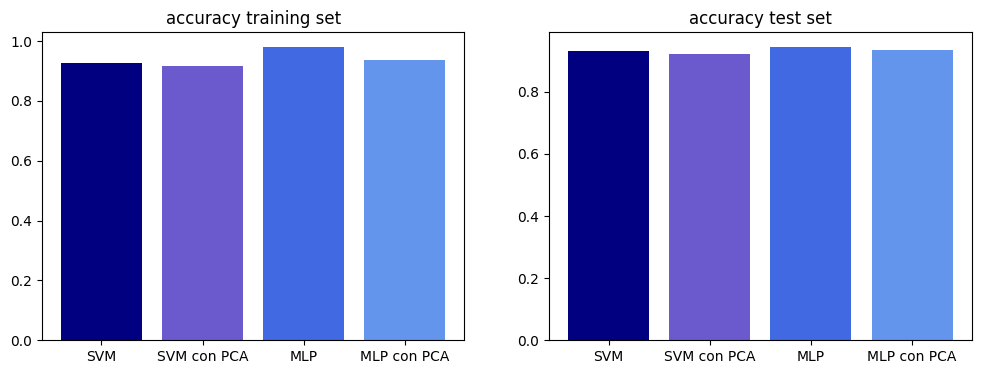

In [24]:
labels=['SVM', 'SVM con PCA','MLP', 'MLP con PCA']
acc_train_final=[lsvm_hard.score(X_train,y_train),lsvm_hard_pca.score(pca.transform(X_train),y_train),acc_train, acc_train_pca]
acc_test_final=[lsvm_hard.score(X_test,y_test),lsvm_hard_pca.score(pca.transform(X_test),y_test),acc,acc_pca]
color=['navy','slateblue','royalblue','cornflowerblue']
fig,axs=plt.subplots(1,2,figsize=(12,4))
axs[0].bar(labels,acc_train_final,color=color)
axs[0].set_title('accuracy training set')
axs[1].bar(labels,acc_test_final,color=color)
axs[1].set_title('accuracy test set')

In conclusion, among those analyzed, the most effective method for classifying an email as *spam* or *non-spam* is the multi-layer perceptron.